# Network Analytics 

A network view of data is often easier to understand and more intuitive than any other types of data representation (e.g., word frequency, word cloud, word charts)

There could be many types of networks in the real world (e.g., business, biology, computer systems).

Below we review some popular examples.

In [2]:
import csv
import pandas as pd
import re

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

# To ignore all warnings that arise here to enhance clarity
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

pd.options.mode.chained_assignment = None  # default='warn'

# Networks in Twitter (and other social media platforms)

## Mention Network

Consider a tweet by **@kevin**, **"@amy, are you available today? how about coffee this afternoon? #friday**

The above tweet creates a relationship between @kevin and @amy. This relationship is created by **mention**.

In [13]:
# some random tweets for learning purpose

df = pd.read_csv('../Advanced_Network_Analytics/random_tweets_for_networkanalytics.csv')
df.head()

,created_at,id,screen_name,texts,created_at_string,favorite_count,follower_count,following_count,geo_coordinates,quote_count,retweet_count
0,10/7/2018 15:38,1.048960e+18,JuSLIKEMIKE911,I had planned to clean up and meal prep when I got up but the way these Applebees leftovers and this blunt setup...,2018-38-07T15:38:20.000Z,5,19621,2477,NaN,0,0
1,11/18/2018 1:40,1.063970e+18,Beauu_Kiwi,Lawrenceville or Applebees tonight. What's the move?,2018-40-18T01:40:31.000Z,0,351,223,NaN,0,0
2,12/29/2018 0:24,1.078810e+18,WashedUpJustin_,@TheRealEazy32 Applebee’s 2 for 20 she can get a water with lemons. I aint going over 60% when we ain’t tight like that,2018-24-29T00:24:58.000Z,0,1564,630,NaN,0,1
3,11/13/2018 3:57,1.062190e+18,CdrMarvel,WIN a $50 Applebee's eGift Card @RoyalDraw https://t.co/WNNt5XU44H #RoyalDraw #giveaway #contest #free #win #sweepstakes,2018-57-13T03:57:08.000Z,0,9,63,NaN,0,0
4,10/18/2018 17:25,1.052970e+18,Paulwunder,@NYorNothing Does this happen at Applebee's?,2018-25-18T17:25:02.000Z,3,954,3227,NaN,0,1


In [14]:
# let's process the data in list (better for text processing)
tweets = df.values
len(tweets)

300

In [15]:
for tweet in tweets[:2]:
    print(tweet)

['10/7/2018 15:38' 1.04896e+18 'JuSLIKEMIKE911'
 'I had planned to clean up and meal prep when I got up but the way these Applebees leftovers and this blunt setup...'
 '2018-38-07T15:38:20.000Z' 5 19621 2477 nan 0 0]
['11/18/2018 1:40' 1.06397e+18 'Beauu_Kiwi'
 "Lawrenceville or Applebees tonight. What's the move?"
 '2018-40-18T01:40:31.000Z' 0 351 223 nan 0 0]


In [16]:
for tweet in tweets[:5]:
    print(tweet[2], tweet[3])

JuSLIKEMIKE911 I had planned to clean up and meal prep when I got up but the way these Applebees leftovers and this blunt setup...
Beauu_Kiwi Lawrenceville or Applebees tonight. What's the move?
WashedUpJustin_ @TheRealEazy32 Applebee’s 2 for 20 she can get a water with lemons. I aint going over 60% when we ain’t tight like that
CdrMarvel WIN a $50 Applebee's eGift Card @RoyalDraw https://t.co/WNNt5XU44H #RoyalDraw #giveaway #contest #free #win #sweepstakes
Paulwunder @NYorNothing Does this happen at Applebee's?


In [17]:
mention = []

for tweet in tweets:
    mention.append([tweet[2], tweet[3]])
    
mention[:5]

[['JuSLIKEMIKE911',
  'I had planned to clean up and meal prep when I got up but the way these Applebees leftovers and this blunt setup...'],
 ['Beauu_Kiwi', "Lawrenceville or Applebees tonight. What's the move?"],
 ['WashedUpJustin_',
  '@TheRealEazy32 Applebee’s 2 for 20 she can get a water with lemons. I aint going over 60% when we ain’t tight like that'],
 ['CdrMarvel',
  "WIN a $50 Applebee's eGift Card @RoyalDraw https://t.co/WNNt5XU44H #RoyalDraw #giveaway #contest #free #win #sweepstakes"],
 ['Paulwunder', "@NYorNothing Does this happen at Applebee's?"]]

In [18]:
# computationally intensive ... very slow if you have a lot of data
for i in mention[:5]:
    print(i[0], i[1])

JuSLIKEMIKE911 I had planned to clean up and meal prep when I got up but the way these Applebees leftovers and this blunt setup...
Beauu_Kiwi Lawrenceville or Applebees tonight. What's the move?
WashedUpJustin_ @TheRealEazy32 Applebee’s 2 for 20 she can get a water with lemons. I aint going over 60% when we ain’t tight like that
CdrMarvel WIN a $50 Applebee's eGift Card @RoyalDraw https://t.co/WNNt5XU44H #RoyalDraw #giveaway #contest #free #win #sweepstakes
Paulwunder @NYorNothing Does this happen at Applebee's?


In [19]:
for tweet in mention[:5]:
    print(tweet[0], re.findall(r"(?<=@)\w+", tweet[1]))

JuSLIKEMIKE911 []
Beauu_Kiwi []
WashedUpJustin_ ['TheRealEazy32']
CdrMarvel ['RoyalDraw']
Paulwunder ['NYorNothing']


In [24]:
for tweet in mention[:10]:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        print(tweet[0], i)

WashedUpJustin_ TheRealEazy32
CdrMarvel RoyalDraw
Paulwunder NYorNothing
Carl_Horton THE_REAL_TPAIN
Carl_Horton Applebees
nnGEEElahh scottcras24


In [27]:
#putting everything together

import csv

mention = []
for tweet in tweets:
    mention.append([tweet[2], tweet[3]])
    
openfile = open("../Advanced_Network_Analytics/mentionnetwork.csv", "w", newline='')
w = csv.writer(openfile)

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        w.writerow([tweet[0], i])
        
openfile.close()

mentionnetwork.csv contains two columns representing relationships. Now. you can use **Gephi** for **network analytics**. You should perform various statistical analyses (e.g., centrality, degree) and modularity analysis using Gephi

### Create a network visualization of the mention network using Gephi and embed the visualization (.png) below.

- Mention network should be imported as **directed** network.
- Layout: Use Yifan Hu and then Label Adjust
- Change the size of node label based on in-degree. This will highlight a few nodes such as Applebees.

<img src="../Advanced_Network_Analytics/img/mentionnetwork_import_adjacencylist.png">
<img src="../Advanced_Network_Analytics/img/mentionnetwork_import_directnetwork.png">

# Network visualization of the mention network using Gephi

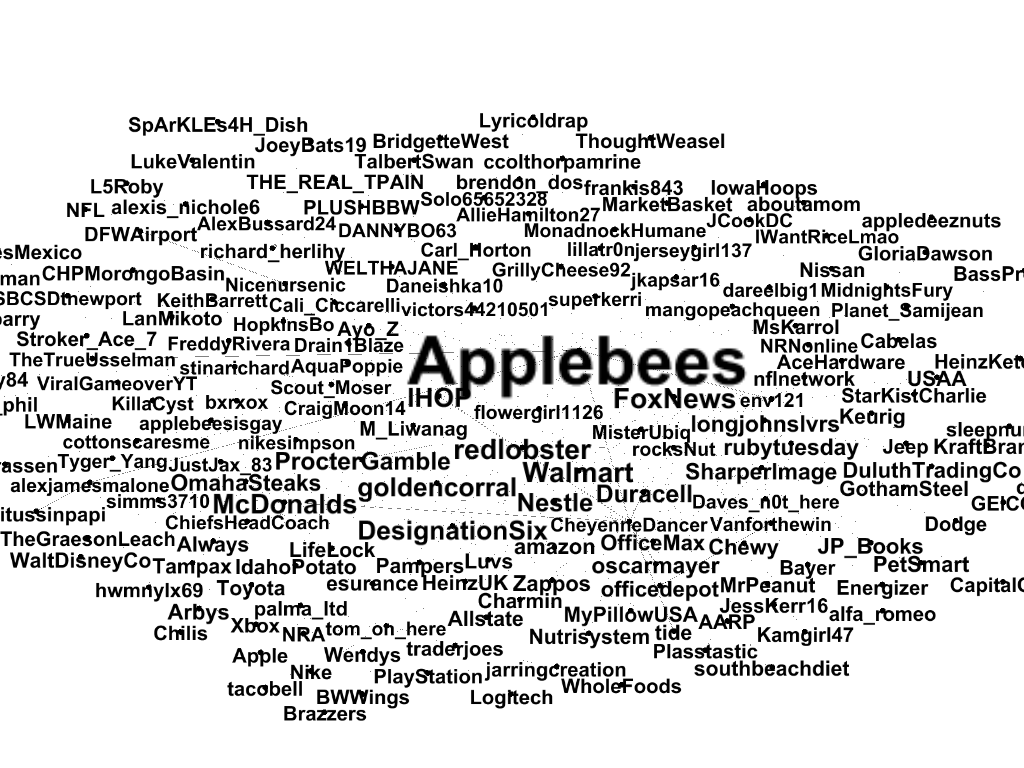

In [3]:
# Include images in ipython notebook
from IPython.display import Image
Image("../Advanced_Network_Analytics/aple.png")

# Statistical analyses (e.g., centrality, degree) and modularity analysis using Gephi

- It was interesting to see the entire network and how the characters had been organized and grouped together into modular communities. It was clear from the physical clusters of my network to identify 61 groups of characters.
- In addition the node size, which was determined according to the node betweenness centrality, allowed for the characters that have the most connectivity to be easily identifiable in comparison to lesser-connected ones. As seen above, it is clear that Applebees and DesignationSix have more connections.
- It is interesting that Applebees and DesignationSix have the high Degree,while these two character pairings appear most frequently together. 
- Bethanidxo have high modularity and DesignationSix modularity is higher than Applebees modularity.

## Co-Hashtag Network = Network-based Topic Modeling

- Identify co-appearing hashtags and build a network of co-appearing hashtags
- Apply modularity (or network clustering) analysis and identify topics or themes
- This is similar to topic modeling: the difference is that topic modeling uses texts, and this proposed approach uses hashtags and network analysis

In [ ]:
for tweet in tweets[:5]:
    print(tweet[3])

In [ ]:
for tweet in tweets[:5]:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[3])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    print(hashtag)

In [ ]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[3])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [ ]:
hashtag_network[:20]

In [ ]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:10]

In [ ]:
#for cohashtag analysis
outfile = open("data/cohashtag_network.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

### Create a network visualization of the cohashtag network using Gephi and embed the visualization (.png) below.

- Cohashtag network should be **undirected** network.
- Layout: Use Fruchterman Reingold and then Label Adjust
- Change the size of node label based on degree. This will highlight a few nodes such as Applebees.

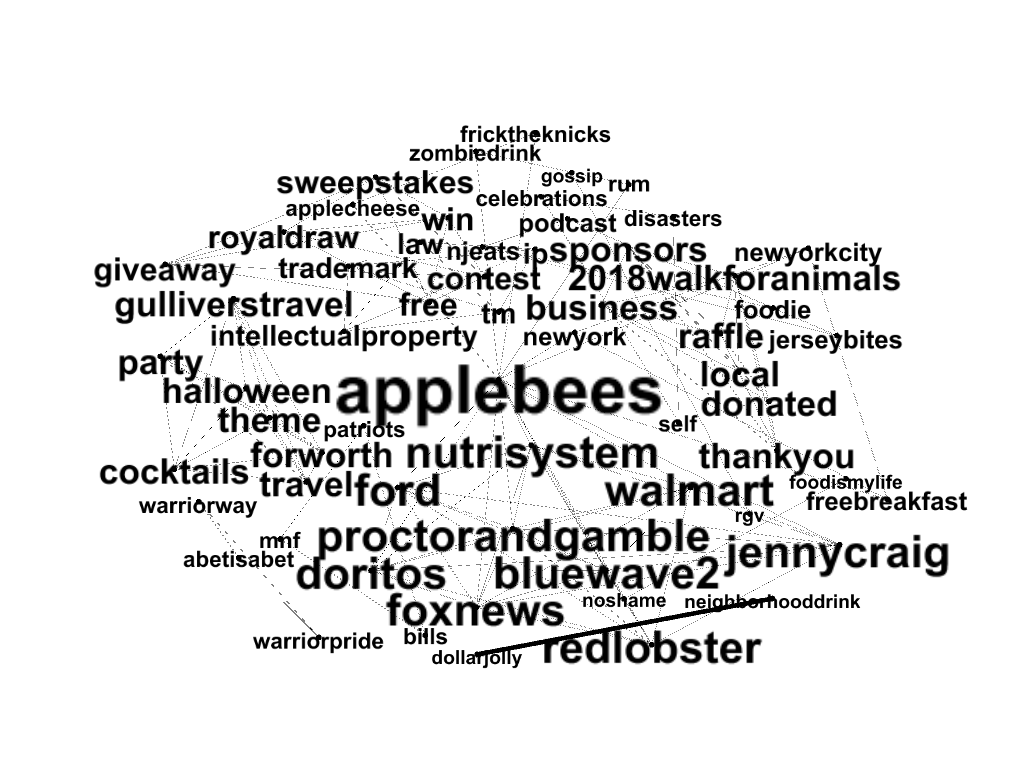

In [4]:

# Include images in ipython notebook
from IPython.display import Image
Image("../Advanced_Network_Analytics/apple.png")